# Group number 2 Project 

## The members are:

* Hassain Alsayhah       ID: 202028180
* Mahdi Alkhalaf         ID: 202041560
* Mohaamed Almahaisen    ID: 202035880
* Nasrallah Aldar        ID: 202040600
* Mohana Al muhanna      ID: 202039320



# Discovery: 

## dataset:

### name: Saudi Arabia Weather History
### URL:  https://www.kaggle.com/datasets/esraamadi/saudi-arabia-weather-history

#### description:
this dataset, provide hourly historical weather data for all Saudi Arabia cities from 2017 to 2019 . Included a date for which you would like to see weather history such as temperature, wind, humidity, barometer, and visibility.


## Data Preparation

In [2]:
# importing the laibrarys that are needed 
import pandas as pd 

# reading and displaying the data
dataFrame = pd.read_csv("dataset/weather-sa-2017-2019-corrupted.csv")
display(dataFrame.head())
display(dataFrame.info())


,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,NaN,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        249023 non-null  object 
 1   date        249022 non-null  object 
 2   time        249023 non-null  object 
 3   year        249023 non-null  int64  
 4   month       249023 non-null  int64  
 5   day         249023 non-null  int64  
 6   hour        249023 non-null  int64  
 7   minute      249023 non-null  int64  
 8   weather     249020 non-null  object 
 9   temp        249023 non-null  int64  
 10  wind        249023 non-null  int64  
 11  humidity    249006 non-null  object 
 12  barometer   248951 non-null  float64
 13  visibility  249023 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 26.6+ MB


None

In [3]:
# processing and cleaning the data

# Filter/smooth noisy data: Any negative numeric value should be replaced by its absolute value.
display(dataFrame)

# selecteing the numirce columns only
selected_cols= dataFrame.select_dtypes(exclude='object').columns

# we dropped visibility because it is natural for it to have negative values 
selected_cols = selected_cols.drop('visibility')
display(selected_cols)

dataFrame[selected_cols]=dataFrame[selected_cols].applymap(lambda x: x if x>=0 else abs(x))
display(dataFrame)

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,NaN,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


Index(['year', 'month', 'day', 'hour', 'minute', 'temp', 'wind', 'barometer'], dtype='object')

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,NaN,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [4]:
# Handle any missing data appropriately: Replace it with mean or mode for numeric or non-numeric data respectively.

# To identity the location of missing values we can use the following:
dataFrame.isna()

#  Identify the columns containing null values
null_columns=dataFrame.columns[dataFrame.isna().any()]
print('Columns with NaN values are:', null_columns)

#fill NaN values with mean or mode
for c in null_columns:
    if dataFrame[c].dtype!='object':
        value = dataFrame[c].mean()
    else:
        value = dataFrame[c].mode()
        value = value[0]  #0 will be the row(s) name
    dataFrame[c].fillna(value,inplace=True)

display(dataFrame)

Columns with NaN values are: Index(['date', 'weather', 'humidity', 'barometer'], dtype='object')


,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [5]:
# removeing the outliers 


# to find the outlies
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    list_of_outliers_indexes = df.index[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    return list_of_outliers_indexes


In [6]:
# only these lables have outliers
print(selected_cols)

# shape before removing the outliers
display(dataFrame.shape)

index_list = []
for feature in selected_cols:
    index_list.extend(outliers(dataFrame,feature))

# as an example in line 24 thier is an outlier in month 
display(dataFrame.head(25))
dataFrame.drop(index_list,inplace=True)

# now the outlier is gone and also the others 
display(dataFrame.head(25))

# as a result of removing the outliers the shape of the data fram will change 
display(dataFrame.shape)



Index(['year', 'month', 'day', 'hour', 'minute', 'temp', 'wind', 'barometer'], dtype='object')


(249023, 14)

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
5,Qassim,1 January 2017,06:00,2017,1,1,6,0,Clear,13,13,82%,1019.0,16
6,Qassim,1 January 2017,07:00,2017,1,1,7,0,Sunny,12,7,88%,1019.0,16
7,Qassim,1 January 2017,08:00,2017,1,1,8,0,Sunny,14,9,72%,1021.0,16
8,Qassim,1 January 2017,09:00,2017,1,1,9,0,Sunny,15,9,72%,1021.0,7
9,Qassim,1 January 2017,10:00,2017,1,1,10,0,Sunny,17,7,64%,1021.0,9


,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
5,Qassim,1 January 2017,06:00,2017,1,1,6,0,Clear,13,13,82%,1019.0,16
6,Qassim,1 January 2017,07:00,2017,1,1,7,0,Sunny,12,7,88%,1019.0,16
7,Qassim,1 January 2017,08:00,2017,1,1,8,0,Sunny,14,9,72%,1021.0,16
8,Qassim,1 January 2017,09:00,2017,1,1,9,0,Sunny,15,9,72%,1021.0,7
9,Qassim,1 January 2017,10:00,2017,1,1,10,0,Sunny,17,7,64%,1021.0,9


(244659, 14)

Model planning

In [7]:
#obtain statistical summary for numerical columns
display(dataFrame.describe())

# to get summary of non-numeric columns

# Idenfity non-numeric columns
cat_columns= dataFrame.select_dtypes(include='object').columns

# Show summary of non-numeric columns
dataFrame[cat_columns].describe()

,year,month,day,hour,minute,temp,wind,barometer,visibility
count,244659.000000,244659.000000,244659.000000,244659.000000,244659.0,244659.000000,244659.000000,244659.000000,244659.000000
mean,2017.709273,6.057701,15.681520,12.519911,0.0,24.641595,12.675540,1015.596232,11.125689
std,0.706705,3.532989,8.788307,6.922386,0.0,8.843275,8.263381,6.810873,7.045281
min,2017.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,996.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.0,18.000000,7.000000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,12.000000,0.0,24.000000,11.000000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.0,31.000000,19.000000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,0.0,50.000000,37.000000,1032.000000,161.000000


,city,date,time,weather,humidity
count,244659,244659,244659,244659,244659
unique,13,851,24,79,92
top,Mecca,7 May 2017,07:00,Clear,13%
freq,20138,312,10364,97926,6781


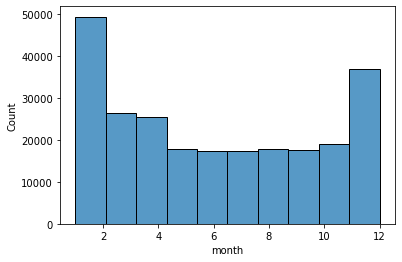

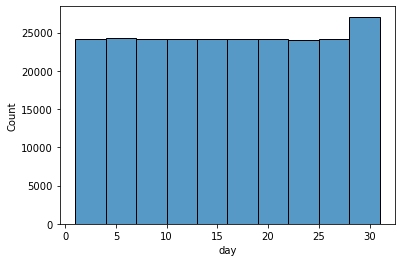

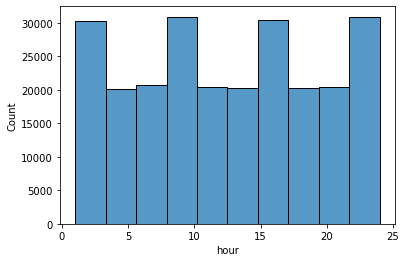

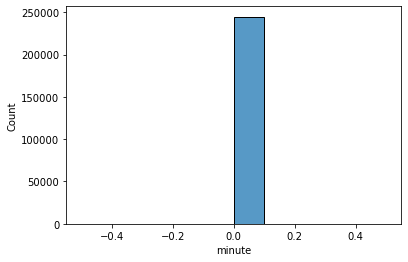

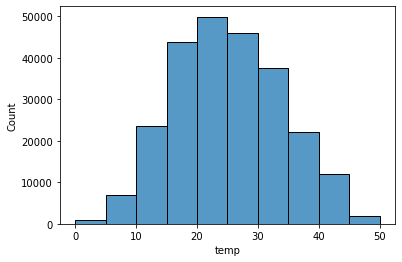

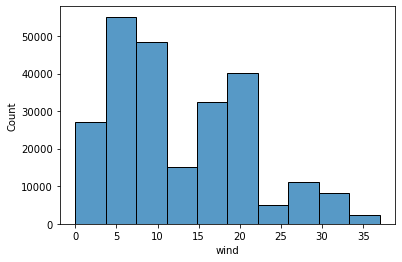

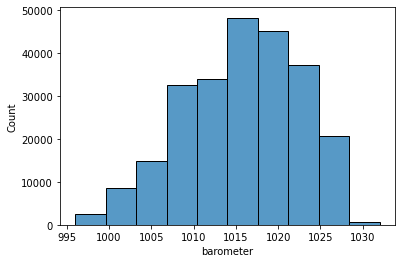

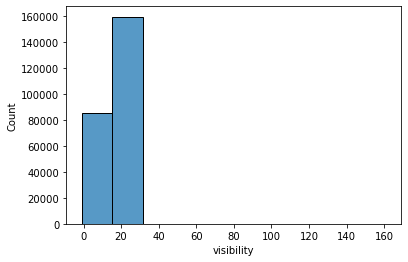

In [8]:
%matplotlib inline
# 3. (a) Draw histograms of both numeric and non-numeric columns.

# Load all the libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modifying humidity column to be between 0-1
# df['humidity']=df['humidity'].apply(lambda x: int(x.replace('%',''))/100)

# Identify numeric columns
num_columns = dataFrame.select_dtypes(exclude='object').columns.drop('year')

for c in num_columns:
    plt.figure()
    sns.histplot(x=c,bins=10,data=dataFrame);
    plt.show()


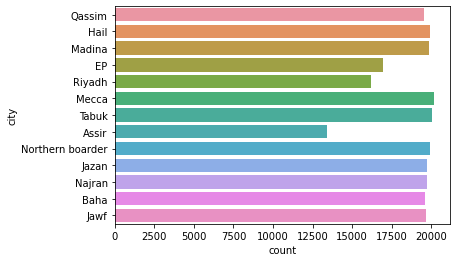

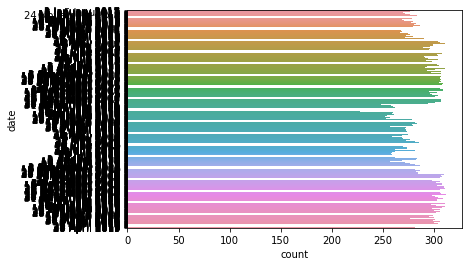

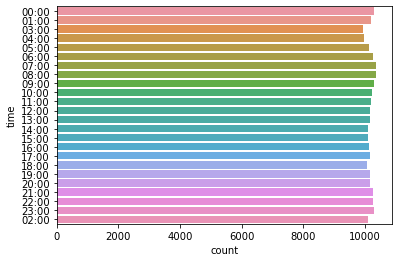

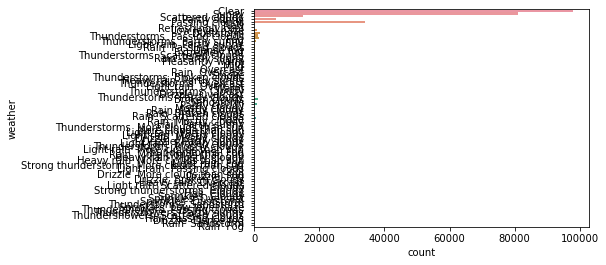

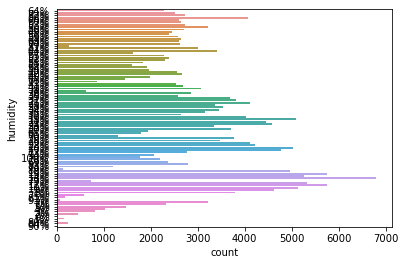

In [9]:
# Identify non-numeric columns
obj_columns = dataFrame.select_dtypes('object').columns

# Plot for each identified column
for c in obj_columns:
    plt.figure()
#     sns.histplot(y=c,data=df);
    sns.countplot(y=c,data=dataFrame);
    plt.show()

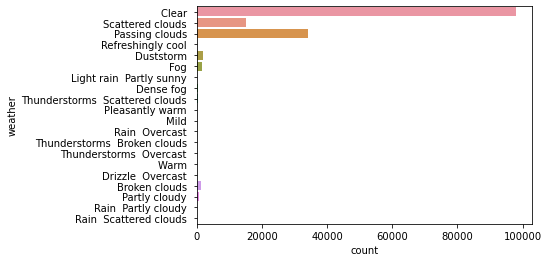

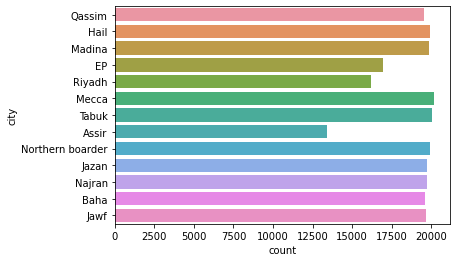

In [10]:
#showing cout for some weather description
# df['weather']=df['weather'].apply(lambda x: x.replace(' ',''))
x = dataFrame['weather'].unique().tolist()

seleted_rows = dataFrame['weather'].isin(x[0:40:2])
seleted_rows = dataFrame.loc[seleted_rows,'weather']

plt.figure()
sns.countplot(y=seleted_rows,data=dataFrame)
plt.show()

#ploting the count of the cities
plt.figure()
sns.countplot(y="city",data=dataFrame)
plt.show()


# df['weather'].unique().tolist()

# null_columns=df.columns[df.isna().any()]
# print('Columns with NaN values are:', null_columns)
# df['weather'] == 'Clear '

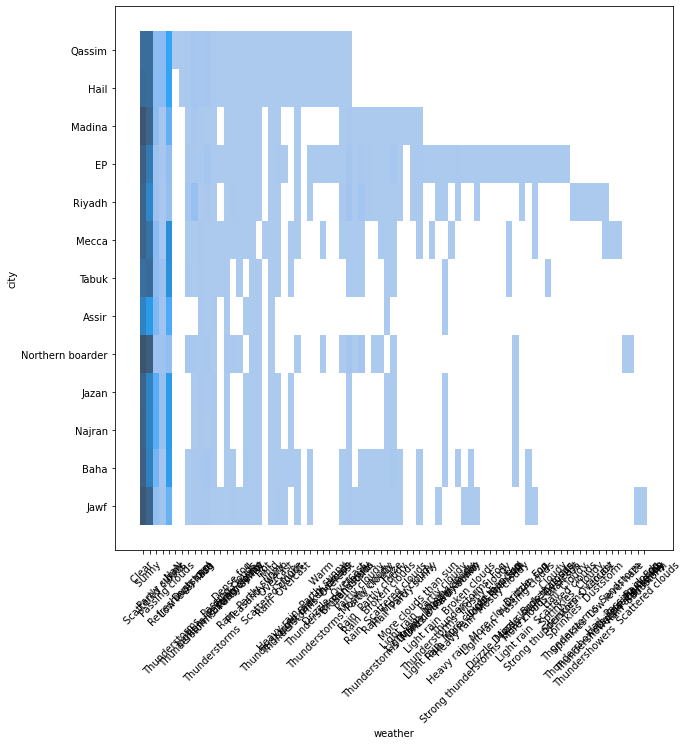

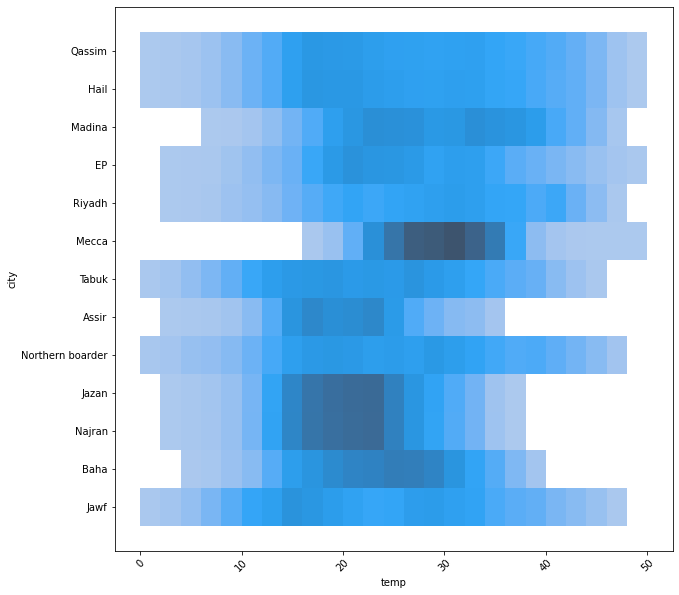

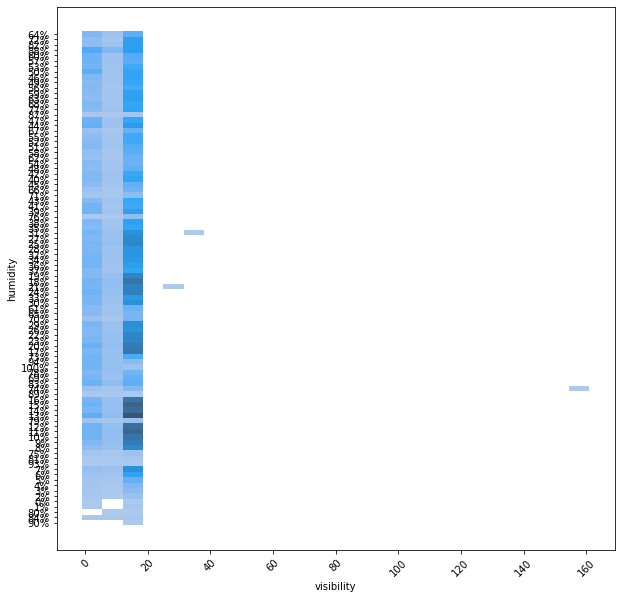

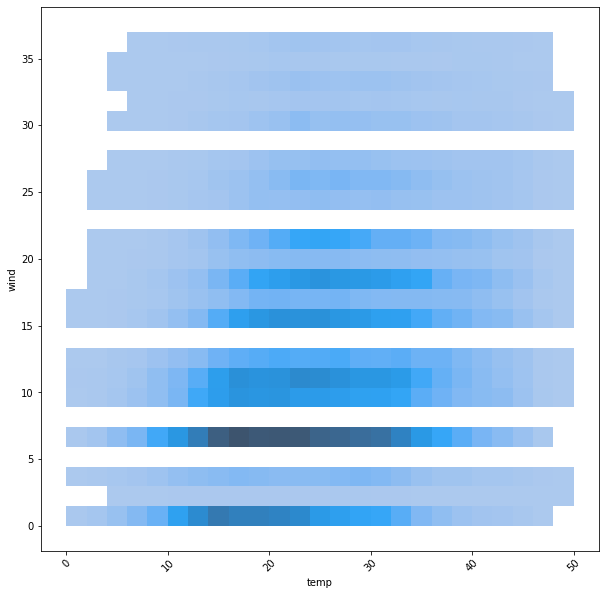

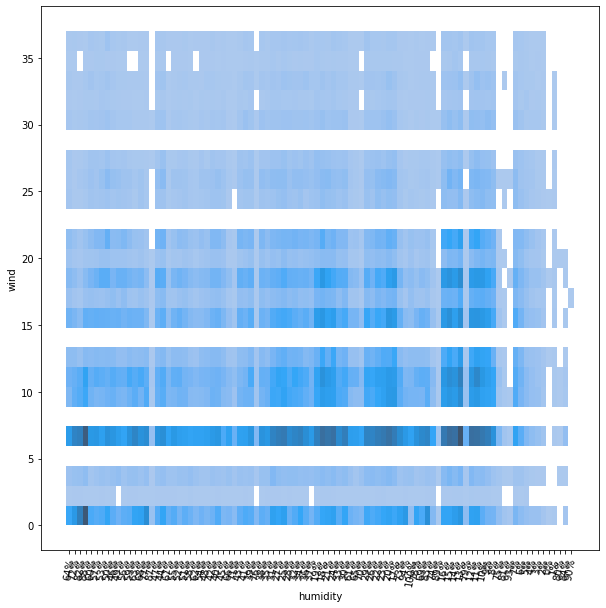

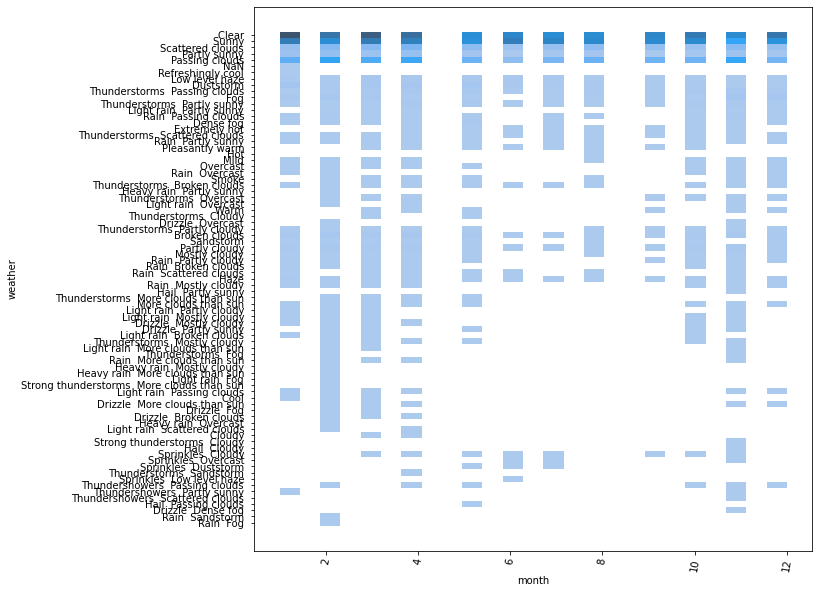

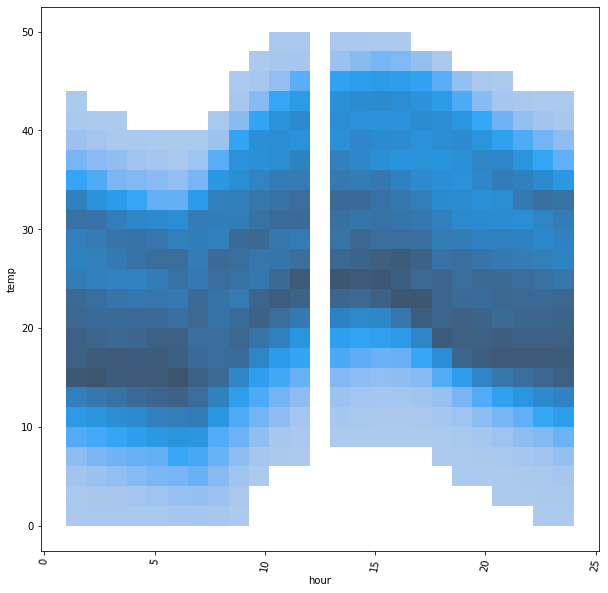

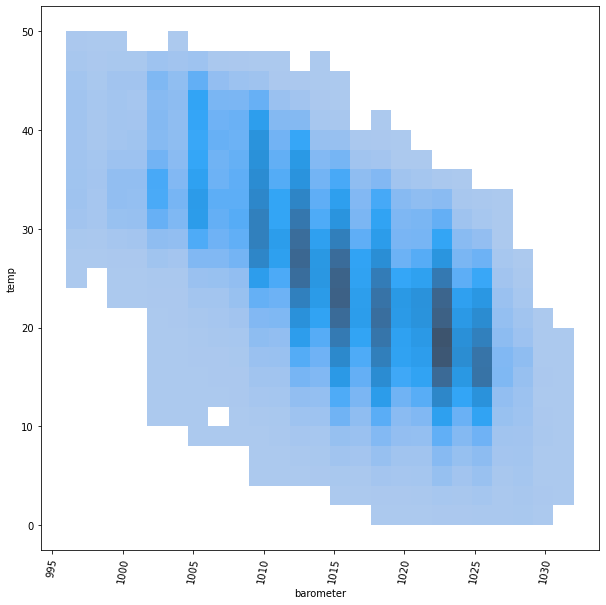

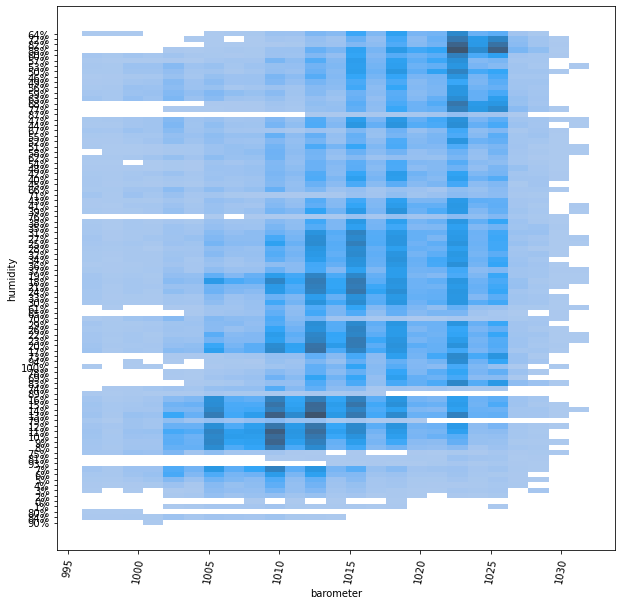

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.histplot(x='weather', y='city', bins=25, data=dataFrame)
plt.xticks(rotation=45)
plt.show()



plt.figure(figsize=(10,10))
sns.histplot(x='temp', y='city', bins=25, data=dataFrame)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='visibility', y='humidity', bins=25, data=dataFrame)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='temp', y='wind', bins=25, data=dataFrame)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='humidity', y='wind', bins=25, data=dataFrame)
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='month', y='weather', bins=25, data=dataFrame)
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='hour', y='temp', bins=25, data=dataFrame)
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='barometer', y='temp', bins=25, data=dataFrame)
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(x='barometer', y='humidity', bins=25, data=dataFrame)
plt.xticks(rotation=80)
plt.show()


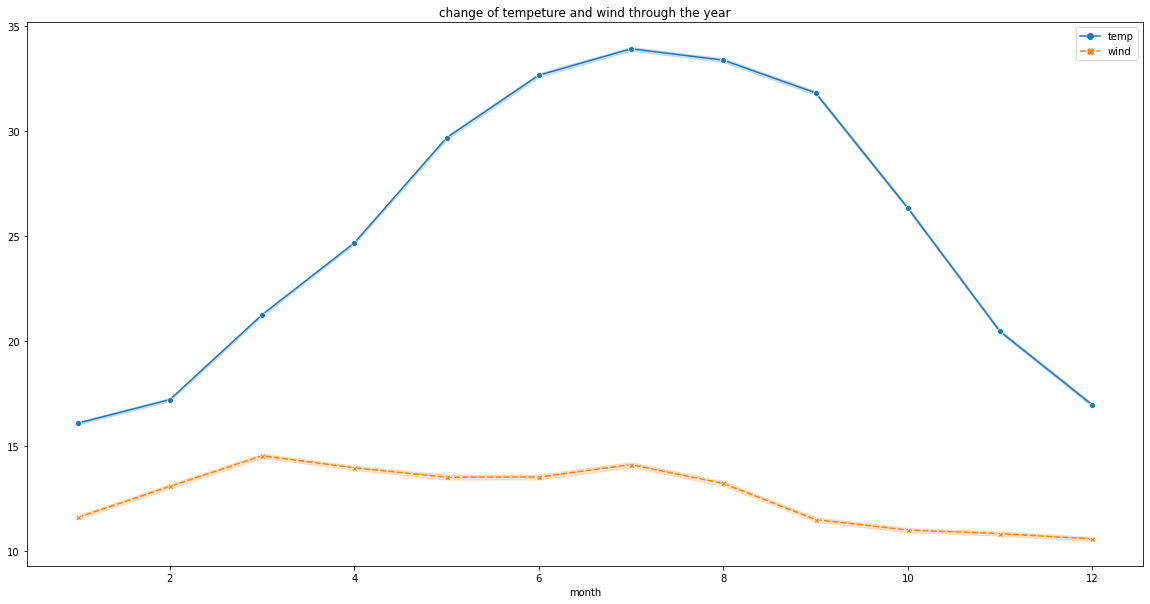

In [86]:
ndd_col = [ "temp", "month", "wind"]
ndf =  dataFrame.loc[:, ndd_col]
ndf.set_index('month',inplace=True)
plt.figure(figsize=(20,10))
sns.lineplot(markers=True, data=ndf) 
plt.title("change of tempeture and wind through the year")
plt.show()


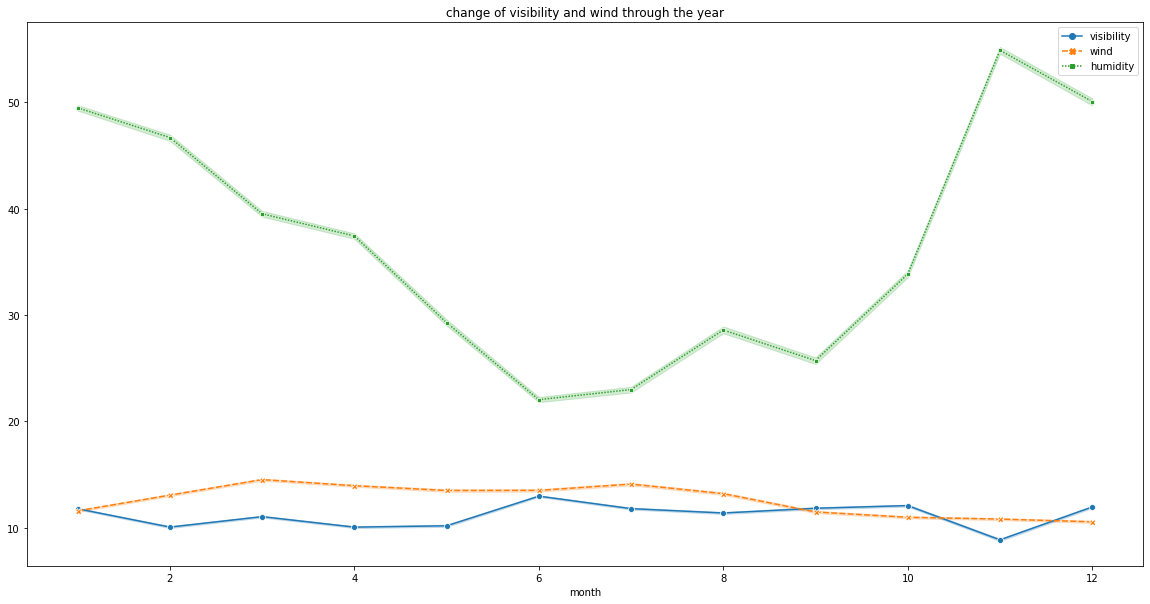

In [98]:
#dataFrame["humidity"] = dataFrame["humidity"].apply(lambda x: int(x.replace("%","")))
ndd_col = [ "visibility", "month", "wind","humidity"]
ndf =  dataFrame.loc[:, ndd_col]
ndf.set_index('month',inplace=True)
plt.figure(figsize=(20,10))
sns.lineplot(markers=True, data=ndf) 
plt.title("change of visibility and wind through the year")
plt.show()


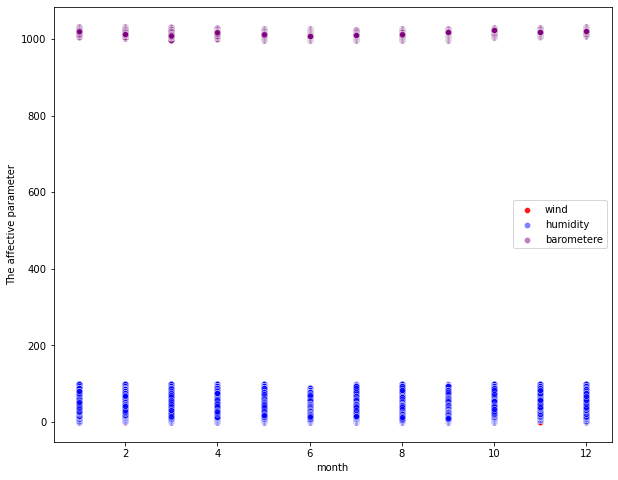

In [107]:
dataFrame["barometer"] = dataFrame["barometer"].apply(lambda x: float(x))

plt.figure(figsize=(10,8))
sns.scatterplot(x='month', y='wind', color='red', label='wind',  alpha=0.9, data=dataFrame)
sns.scatterplot(x='month', y='humidity',color='blue',label='humidity', alpha=0.5, data=dataFrame)
sns.scatterplot(x='month', y='barometer',color='purple',label='barometere', alpha=0.5, data=dataFrame)
plt.ylabel("The affective parameter");
plt.xlabel("month");
plt.title("");
plt.show()

the relationship between numarical variables :


,year,month,day,hour,temp,wind,barometer,visibility
year,1.000000,-0.312281,-0.010283,-0.002052,-0.184430,0.040577,0.088216,-0.063492
month,-0.312281,1.000000,0.013654,-0.001118,0.225190,-0.094511,-0.050605,0.017840
day,-0.010283,0.013654,1.000000,0.000421,0.019858,0.014502,-0.000504,-0.023884
hour,-0.002052,-0.001118,0.000421,1.000000,0.211715,0.208626,-0.023488,-0.080568
temp,-0.184430,0.225190,0.019858,0.211715,1.000000,0.242203,-0.681187,-0.002895
wind,0.040577,-0.094511,0.014502,0.208626,0.242203,1.000000,-0.126175,-0.197444
barometer,0.088216,-0.050605,-0.000504,-0.023488,-0.681187,-0.126175,1.000000,-0.034839
visibility,-0.063492,0.017840,-0.023884,-0.080568,-0.002895,-0.197444,-0.034839,1.000000



 the graphical relationship between numarical variables :


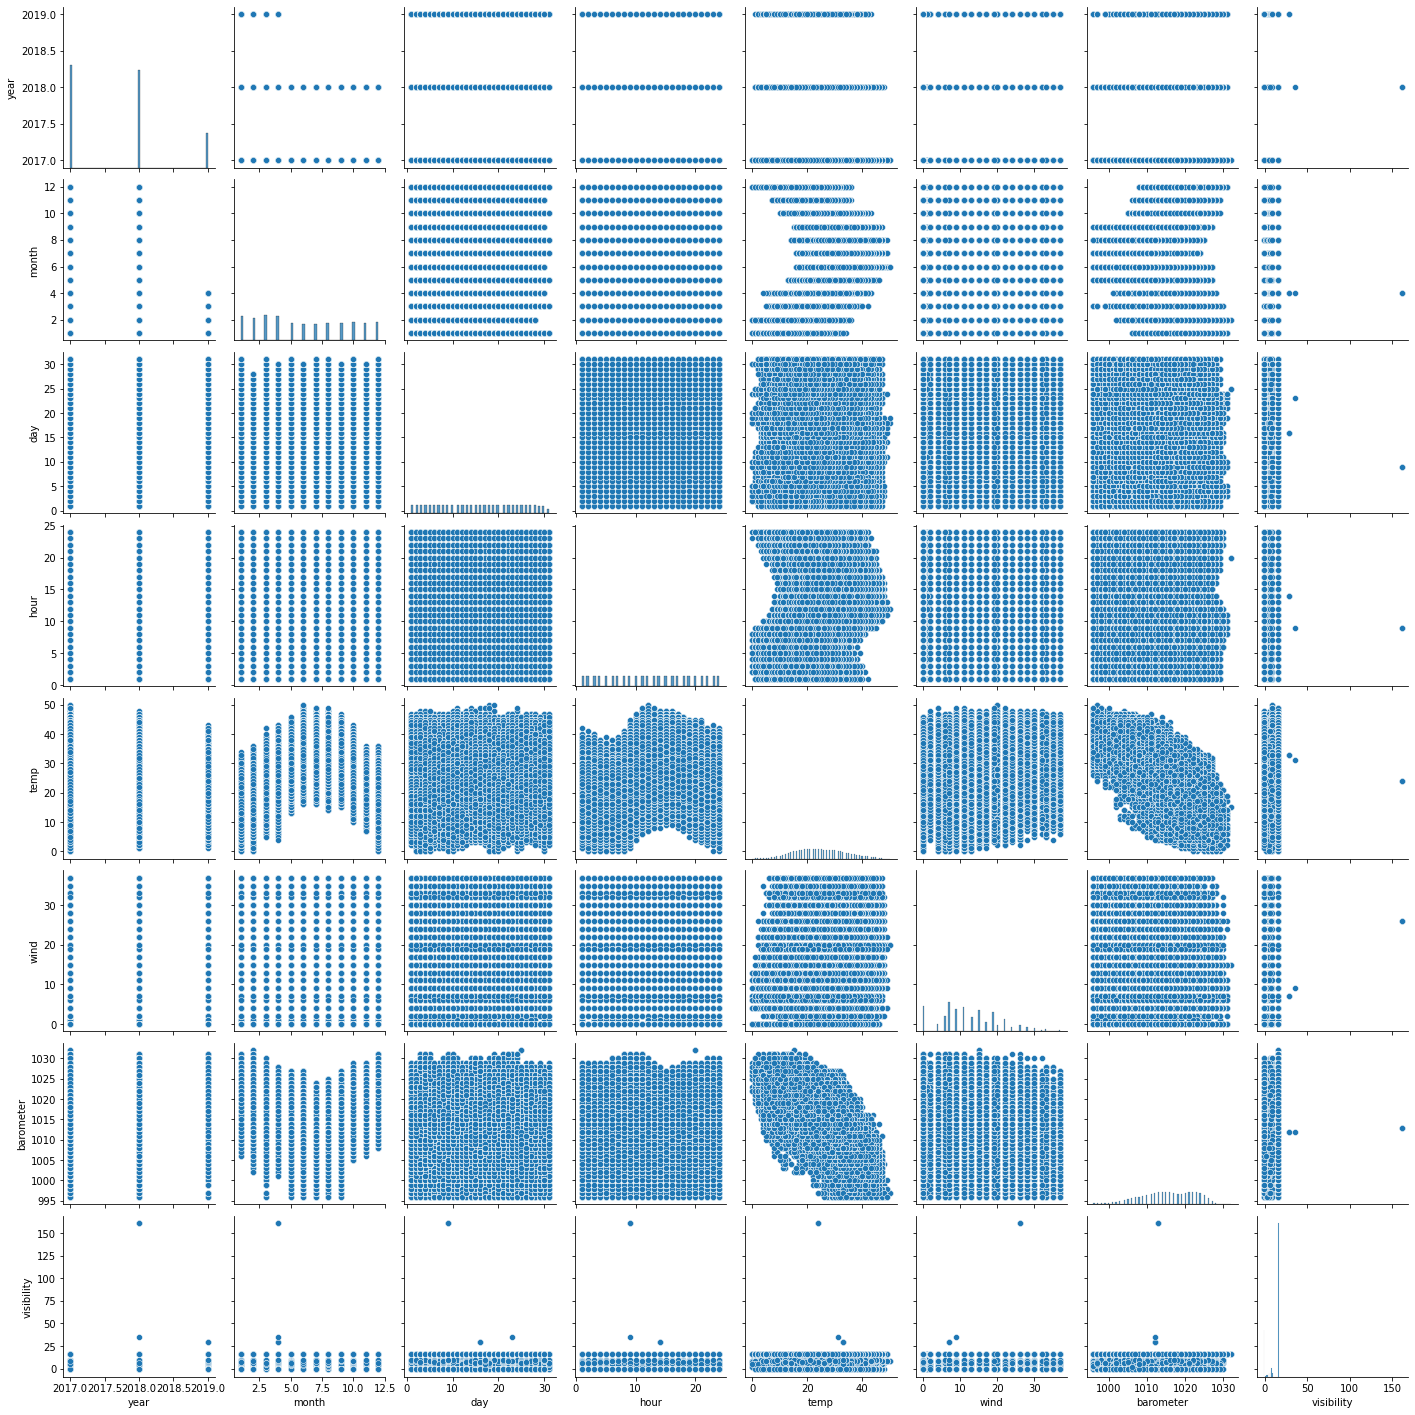

In [108]:
## v. Assess the relationship between variables.
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
## the relationship between numarical variables.

num_vari= dataFrame.select_dtypes(exclude='object') ## to select the numarical data
num_vari= num_vari[['year','month','day','hour','temp','wind','barometer','visibility']]
print('the relationship between numarical variables :')
display(num_vari.corr(method = 'pearson'))## Correlation Matrix

print('\n the graphical relationship between numarical variables :')
sns.pairplot(num_vari, kind="scatter")##Correlation Test
plt.show()

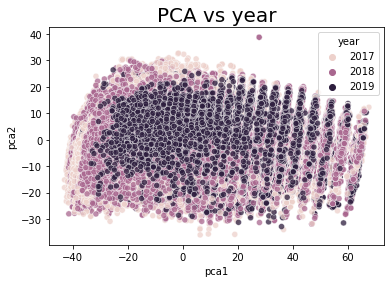

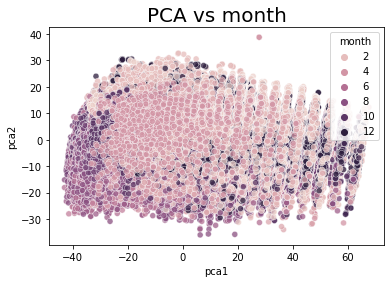

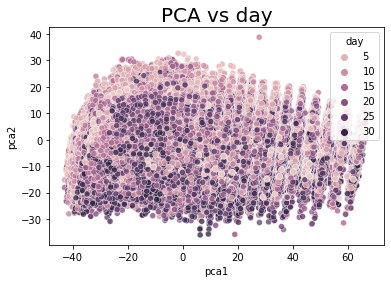

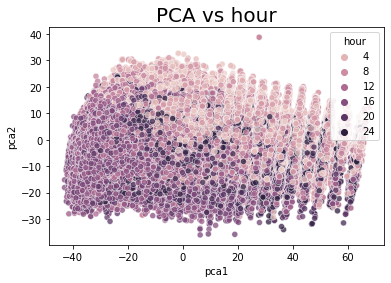

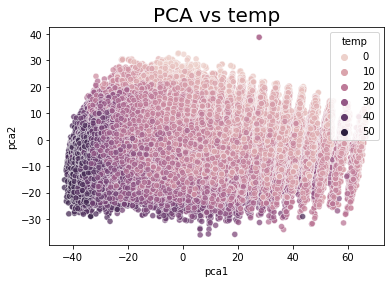

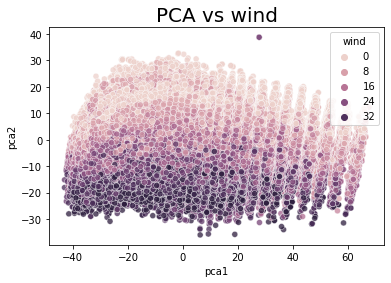

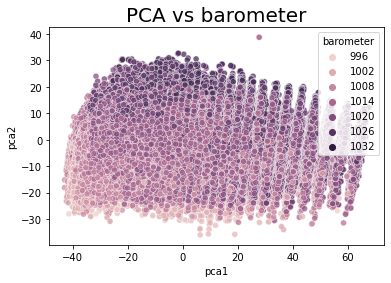

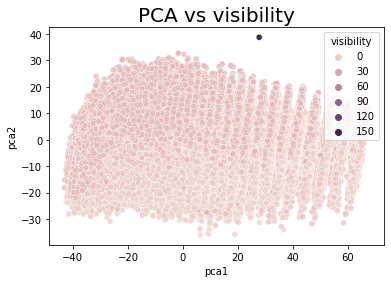

In [109]:
num_columns = dataFrame.select_dtypes(exclude='object').columns
pca_input_columns=num_columns.drop(['minute'])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataFrame[pca_input_columns])
dataFrame['pca1'] = principalComponents[:,0]
dataFrame['pca2'] = principalComponents[:,1]

for i in num_vari:
    plt.figure()
    sns.scatterplot(x='pca1',y='pca2',
            hue=i,
            alpha=0.75,
            data=dataFrame)
    plt.title('PCA vs'+' '+i, fontsize = 20)
    plt.show()

# b. Summarise your findings.

## Strength:
the relationships between variables are in range (0 to 0.4) which indicate there are no relation between the variables 


## Directions:
most the relationships are negative which implies if one increase, then other will decrease.

## overview
in the night the temperature will decrease and the average temperature is 25.